  Plant Type Leaf Color Leaf Shape Presence of Spots Disease Severity  \
0     Tomato      Green       Oval               Yes             Mild   
1     Tomato     Yellow      Round               Yes           Severe   
2     Tomato      Green      Heart                No             None   
3     Potato      Green       Oval                No             None   
4     Potato      Green      Round               Yes         Moderate   

        Disease Type  
0       Early Blight  
1        Late Blight  
2            Healthy  
3            Healthy  
4  Leaf Spot Disease  
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
[[6 0]
 [0 9]]


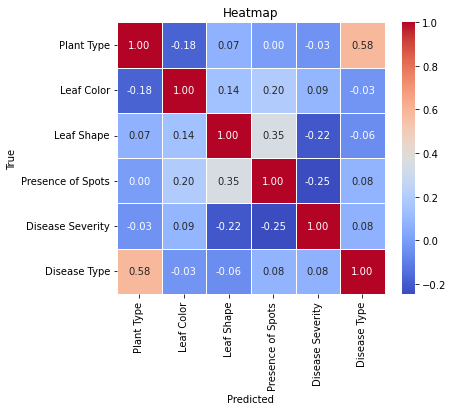

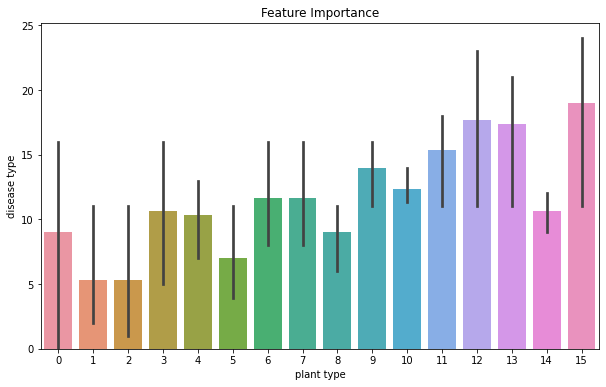

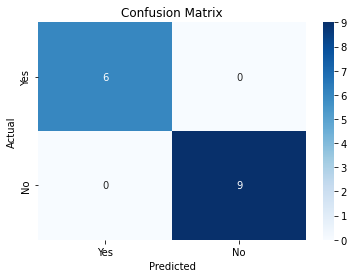

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset from a CSV file
df = pd.read_csv('plant.csv')
print(df.head())# Replace with the actual path of your dataset
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encoding categorical columns to numeric values
df['Plant Type'] = label_encoder.fit_transform(df['Plant Type'])
df['Leaf Color'] = label_encoder.fit_transform(df['Leaf Color'])
df['Leaf Shape'] = label_encoder.fit_transform(df['Leaf Shape'])
df['Presence of Spots'] = df['Presence of Spots'].map({'Yes': 1, 'No': 0})  # Mapping 'Yes' to 1 and 'No' to 0
df['Disease Severity'] = label_encoder.fit_transform(df['Disease Severity'])  # Encoding 'Disease Severity'
df['Disease Type'] = label_encoder.fit_transform(df['Disease Type'])  # Encoding target variable

# Splitting the dataset into features (X) and target (y)
X = df.drop(columns=['Presence of Spots'])  # All columns except 'Disease Type'
y = df['Presence of Spots']  # Target variable

# Scaling the numerical feature (optional but helps in some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# --- Visualization ---
# 1. Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
correlation=df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# 2. Plot the Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Plant Type'], y=df['Disease Type'])
plt.title('Feature Importance')
plt.xlabel('plant type')
plt.ylabel('disease type')
plt.show()


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

